In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('Country_clusters.csv')
df

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,India,20.59,78.96,Hindi
2,Canada,62.40,-96.80,English
3,France,46.75,2.40,French
4,UK,54.01,-2.53,English
5,Nepal,28.39,84.12,Hindi
6,Germany,51.15,10.40,German
7,Australia,-25.45,133.11,English
8,Pakistan,3.37,69.34,Hindi
9,Belgium,50.50,4.46,French


<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

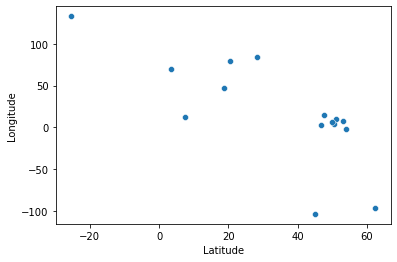

In [3]:
sns.scatterplot(df['Latitude'],df['Longitude'])

In [4]:
df['Language'].replace({'English':0,'French':1,'Hindi':2,'German':3},inplace=True)

In [5]:
df['Language'].value_counts()

0    5
1    4
2    3
3    3
Name: Language, dtype: int64

In [6]:
df

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,India,20.59,78.96,2
2,Canada,62.40,-96.80,0
3,France,46.75,2.40,1
4,UK,54.01,-2.53,0
5,Nepal,28.39,84.12,2
6,Germany,51.15,10.40,3
7,Australia,-25.45,133.11,0
8,Pakistan,3.37,69.34,2
9,Belgium,50.50,4.46,1


In [7]:
new = df[['Latitude','Longitude']]
new.head()

,Latitude,Longitude
0,44.97,-103.77
1,20.59,78.96
2,62.40,-96.80
3,46.75,2.40
4,54.01,-2.53


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
std_scaler = StandardScaler()
x_scaled = std_scaler.fit_transform(new)
new = pd.DataFrame(x_scaled, columns=new.columns)
new

,Latitude,Longitude
0,0.452232,-2.026256
1,-0.573134,1.018944
2,1.185298,-1.910101
3,0.527095,-0.256930
4,0.832434,-0.339089
5,-0.245084,1.104936
6,0.712149,-0.123610
7,-2.509470,1.921355
8,-1.297368,0.858626
9,0.684811,-0.222600


## Model Training

In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans_model = KMeans(n_clusters=4)
kmeans_model.fit(new)

KMeans(n_clusters=4)

In [12]:
y_var = kmeans_model.fit_predict(new)
y_var

array([2, 0, 2, 1, 1, 0, 1, 3, 0, 1, 1, 1, 0, 1, 0])

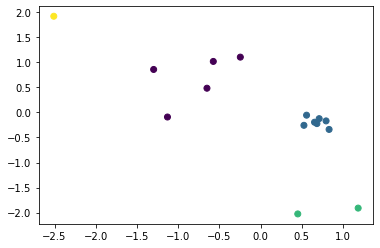

In [13]:
plt.scatter(new['Latitude'],new['Longitude'], c=y_var)

In [14]:
kmeans_model.cluster_centers_

array([[-0.77904858,  0.67507792],
       [ 0.68102612, -0.19434117],
       [ 0.81876505, -1.96817826],
       [-2.5094701 ,  1.9213551 ]])

## WCSS

In [15]:
Within Clusters Sum of Squares


SyntaxError: invalid syntax (<ipython-input-15-84110bab11d8>, line 1)

In [16]:
kmeans_model.inertia_

2.0985607474403545

In [17]:
wcss_list = []
for k in range(1,10):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(new)
    wcss = kmeans_model.inertia_
    wcss_list.append(wcss)
    print(f'k == {k}, WCSS == {wcss}')

k == 1, WCSS == 30.0
k == 2, WCSS == 10.812263162282425
k == 3, WCSS == 5.888198626293173
k == 4, WCSS == 2.0985607474403545
k == 5, WCSS == 1.1435031178344213
k == 6, WCSS == 0.7215328444046483
k == 7, WCSS == 0.4460943100436202
k == 8, WCSS == 0.18469790346477385
k == 9, WCSS == 0.12514231716843452


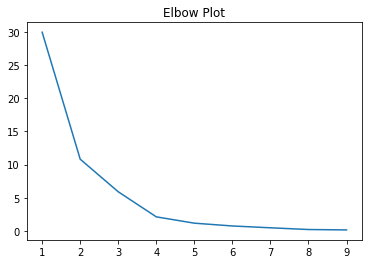

In [18]:
k = range(1,10)
plt.title('Elbow Plot')
plt.plot(k, wcss_list)

# #################

In [19]:
kmeans_model = KMeans(n_clusters=4)
kmeans_model.fit(new)

KMeans(n_clusters=4)

In [20]:
kmeans_model.labels_

array([2, 1, 2, 0, 0, 1, 0, 3, 1, 0, 0, 0, 1, 0, 1])

In [21]:
df['Cluster'] = kmeans_model.labels_
df

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,2
1,India,20.59,78.96,2,1
2,Canada,62.40,-96.80,0,2
3,France,46.75,2.40,1,0
4,UK,54.01,-2.53,0,0
5,Nepal,28.39,84.12,2,1
6,Germany,51.15,10.40,3,0
7,Australia,-25.45,133.11,0,3
8,Pakistan,3.37,69.34,2,1
9,Belgium,50.50,4.46,1,0


In [22]:
cluster_range = range(1,10)
cluster_errors = []

for n_clust in cluster_range:
    kmeans_model = KMeans(n_clust)
    kmeans_model.fit(new)
    cluster_errors.append(kmeans_model.inertia_)

In [23]:
cluster_df = pd.DataFrame({'Num_Cluster':cluster_range, 'cluster_errors': cluster_errors})
cluster_df

,Num_Cluster,cluster_errors
0,1,30.000000
1,2,10.812263
2,3,5.888199
3,4,2.098561
4,5,1.143503
5,6,0.721533
6,7,0.446094
7,8,0.184698
8,9,0.127192


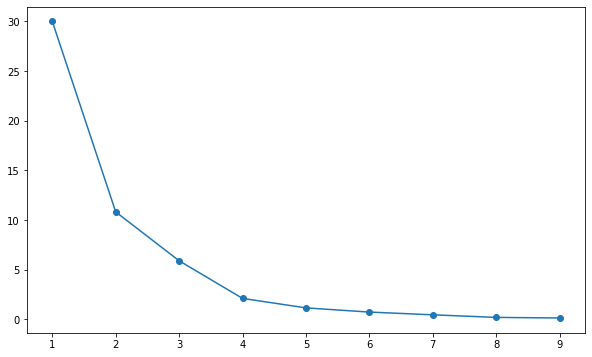

In [24]:
plt.figure(figsize=(10,6))
plt.plot(cluster_df.Num_Cluster , cluster_df.cluster_errors, marker ='o')

In [25]:
from sklearn.metrics import silhouette_score
cluster_range = range(2,10)
cluster_scores = []

for n_clust in cluster_range:
    kmeans_model = KMeans(n_clusters=n_clust)
    kmeans_model.fit(new)
    cluster_scores.append(silhouette_score(new,kmeans_model.labels_))

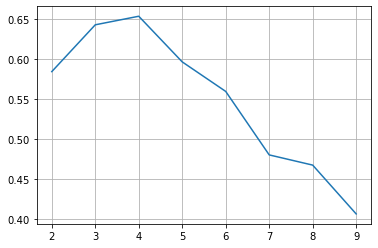

In [26]:
plt.plot(cluster_range,cluster_scores)
plt.grid(True)

In [27]:
df['Cluster'] = kmeans_model.labels_
df

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,6
1,India,20.59,78.96,2,8
2,Canada,62.40,-96.80,0,0
3,France,46.75,2.40,1,2
4,UK,54.01,-2.53,0,2
5,Nepal,28.39,84.12,2,1
6,Germany,51.15,10.40,3,2
7,Australia,-25.45,133.11,0,3
8,Pakistan,3.37,69.34,2,4
9,Belgium,50.50,4.46,1,2


In [28]:
kmeans_model.labels_

array([6, 8, 0, 2, 2, 1, 2, 3, 4, 2, 2, 2, 5, 2, 7])

In [61]:
df[df['Cluster']==1]

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,1
2,Canada,62.40,-96.80,0,1
3,France,46.75,2.40,1,1
4,UK,54.01,-2.53,0,1
9,Belgium,50.50,4.46,1,1
11,Ireland,53.14,7.69,0,1


In [62]:
df[df['Cluster']==2]

,Country,Latitude,Longitude,Language,Cluster
6,Germany,51.15,10.40,3,2
10,Austria,47.51,14.55,3,2
13,Luxembourg,49.81,6.12,3,2


In [63]:
df[df['Cluster']==3]

,Country,Latitude,Longitude,Language,Cluster
7,Australia,-25.45,133.11,0,3
